# OpenData REST API

## Libraries and Settings

In [216]:
# Libraries
import os
import requests
import json
import pprint

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [217]:
# Package list of the Swiss open data portal
baseUrl = 'https://opendata.swiss/api/3/action/package_show'
id = '?id=fc0430b9-4b27-4ea5-a7fe-5cb1cf6eb142'
callUrl = baseUrl + id

# Make the HTTP request
response = requests.get(callUrl)

# Use the json module to load CKAN's response into a dictionary
response_dict = json.loads(response.content)

# Check the contents of the response
assert response_dict['success'] is True  # make sure if response is OK
result = response_dict['result']         # extract all the packages from the response
pprint.pprint(result)                    # pretty print the list to the screen

{'accrual_periodicity': 'http://publications.europa.eu/resource/authority/frequency/IRREG',
 'author': None,
 'author_email': None,
 'contact_points': [{'email': 'opendata@zuerich.ch',
                     'name': 'Open Data Zürich'}],
 'creator_user_id': 'af084126-f711-4016-a585-70354e997796',
 'description': {'de': 'Der Datensatz enthält die Resultate der '
                       'Mietpreiserhebung 2022. Enthalten sind die geschätzten '
                       'Mietpreisbandbreiten für vier Raumstufen (Ganze Stadt, '
                       'Stadtkreise, Stadtquartiere und Quartiergruppen). '
                       'Siehe dazu unten unter «Bemerkungen» die weiteren '
                       'Erläuterungen.\n'
                       '\n'
                       'Erleben Sie die Daten auch auf dem interaktiven '
                       '[MPE-Tool](https://www.stadt-zuerich.ch/content/prd/de/index/statistik/publikationen-angebote/datenbanken-anwendungen/mietpreiserhebung.html) '
            

In [218]:
# Print the data format
data_format = result['resources'][0]['format']
print('Data format:  ' + data_format)

Data format:  CSV


In [219]:
# Get the url for the data from the dictionary
data_url = result['resources'][0]['url']
print('Data url:     ' + data_url)

Data url:     https://data.stadt-zuerich.ch/dataset/bau_whg_mpe_mietpreis_raum_zizahl_gn_jahr_od5161/download/BAU516OD5161.csv


In [220]:

df = pd.read_csv(data_url)
# drop unnecessary cols
df.drop(df.columns[0:2], axis=1, inplace=True)
df.drop('ZimmerLang', axis=1, inplace=True)
df.drop(df.columns[12:29], axis=1, inplace=True) #inplace=True verändert Daten direkt auf dataframe, asonsten müsste man df = df.drop() machen

In [221]:
# rename cols
df.rename(columns={'RaumeinheitLang': 'Raumeinheit', 'GliederungLang': 'Gliederung', 'GliederungLang': 'Gliederung', 'Domain':'Grundgesamtheit', 'ZimmerSort': 'Zimmer'}, inplace=True)

In [222]:
# only use brutto prices
df = df[df.PreisartLang != 'Netto']
# only use flats, not square meter entries
df = df[df.EinheitLang == 'Wohnung']

In [223]:
# Drop Preisart cols
df.drop('PreisartLang', axis=1, inplace=True)
df.drop('PreisartSort', axis=1, inplace=True)

In [224]:
# Values in column "Raumeinheit"
df['Raumeinheit'].unique()

array(['Ganze Stadt', 'Stadtkreise', 'Quartiergruppen', 'Quartiere'],
      dtype=object)

In [225]:
# Values in column "Gliederung"
df['Gliederung'].unique()

array(['Ganze Stadt', 'Neubau bis 2 Jahre', 'Neubezug bis 2 Jahre',
       'Bestand Mietverträge 2–10 Jahre',
       'Bestand Mietverträge 11-20 Jahre',
       'Bestand Mietverträge über 20 Jahre', 'Kreis 1', 'Kreis 2',
       'Kreis 3', 'Kreis 4', 'Kreis 5', 'Kreis 6', 'Kreis 7', 'Kreis 8',
       'Kreis 9', 'Kreis 10', 'Kreis 11', 'Kreis 12', 'Sihlfeld',
       'Alt-Wiedikon und Friesenberg', 'Hard', 'Werd und Langstrasse',
       'Unterstrass', 'Oberstrass', 'Fluntern und Hottingen',
       'Hirslanden und Witikon', 'Albisrieden', 'Altstetten', 'Höngg',
       'Wipkingen', 'Affoltern', 'Oerlikon', 'Seebach', 'Hirzenbach',
       'Saatlen und Schwamendingen-Mitte', 'Rathaus', 'Hochschulen',
       'Lindenhof', 'City', 'Wollishofen', 'Leimbach', 'Enge',
       'Alt-Wiedikon', 'Friesenberg', 'Werd', 'Langstrasse',
       'Gewerbeschule', 'Escher Wyss', 'Fluntern', 'Hottingen',
       'Hirslanden', 'Witikon', 'Seefeld', 'Mühlebach', 'Weinegg',
       'Saatlen', 'Schwamendingen-Mitte'], 

In [226]:
# Values in column "GemeinnuetzigLang"
df['GemeinnuetzigLang'].unique()

array(['Alle Wohnungen', 'Gemeinnützig', 'Nicht gemeinnützig'],
      dtype=object)

In [227]:
# Values in column "EinheitLang"
df['EinheitLang'].unique()

array(['Wohnung'], dtype=object)

In [228]:
df.head()

,RaumeinheitSort,Raumeinheit,GliederungSort,Gliederung,Zimmer,GemeinnuetzigSort,GemeinnuetzigLang,EinheitSort,EinheitLang,mean,Grundgesamtheit,Sample1,Sample2
108,1,Ganze Stadt,0,Ganze Stadt,2,0,Alle Wohnungen,1,Wohnung,1584.0,46692,13545,1742
109,1,Ganze Stadt,1,Neubau bis 2 Jahre,2,0,Alle Wohnungen,1,Wohnung,2011.0,1498,488,56
110,1,Ganze Stadt,2,Neubezug bis 2 Jahre,2,0,Alle Wohnungen,1,Wohnung,1777.0,13182,3081,488
111,1,Ganze Stadt,3,Bestand Mietverträge 2–10 Jahre,2,0,Alle Wohnungen,1,Wohnung,1609.0,20055,5922,764
112,1,Ganze Stadt,4,Bestand Mietverträge 11-20 Jahre,2,0,Alle Wohnungen,1,Wohnung,1312.0,6782,2348,253


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 108 to 1790
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RaumeinheitSort    474 non-null    int64  
 1   Raumeinheit        474 non-null    object 
 2   GliederungSort     474 non-null    int64  
 3   Gliederung         474 non-null    object 
 4   Zimmer             474 non-null    int64  
 5   GemeinnuetzigSort  474 non-null    int64  
 6   GemeinnuetzigLang  474 non-null    object 
 7   EinheitSort        474 non-null    int64  
 8   EinheitLang        474 non-null    object 
 9   mean               474 non-null    float64
 10  Grundgesamtheit    474 non-null    int64  
 11  Sample1            474 non-null    int64  
 12  Sample2            474 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 51.8+ KB


In [230]:
#Check for empty entries and remove them
df = df.dropna()
df.isna().sum()

RaumeinheitSort      0
Raumeinheit          0
GliederungSort       0
Gliederung           0
Zimmer               0
GemeinnuetzigSort    0
GemeinnuetzigLang    0
EinheitSort          0
EinheitLang          0
mean                 0
Grundgesamtheit      0
Sample1              0
Sample2              0
dtype: int64

In [231]:
#Check for duplicates and remove them
df = df.drop_duplicates()
df.duplicated().sum()

0

In [232]:
#Delete Summary Rows
df.drop (df[df.GliederungSort == 0].index, inplace=True)
df.head()

,RaumeinheitSort,Raumeinheit,GliederungSort,Gliederung,Zimmer,GemeinnuetzigSort,GemeinnuetzigLang,EinheitSort,EinheitLang,mean,Grundgesamtheit,Sample1,Sample2
109,1,Ganze Stadt,1,Neubau bis 2 Jahre,2,0,Alle Wohnungen,1,Wohnung,2011.0,1498,488,56
110,1,Ganze Stadt,2,Neubezug bis 2 Jahre,2,0,Alle Wohnungen,1,Wohnung,1777.0,13182,3081,488
111,1,Ganze Stadt,3,Bestand Mietverträge 2–10 Jahre,2,0,Alle Wohnungen,1,Wohnung,1609.0,20055,5922,764
112,1,Ganze Stadt,4,Bestand Mietverträge 11-20 Jahre,2,0,Alle Wohnungen,1,Wohnung,1312.0,6782,2348,253
113,1,Ganze Stadt,5,Bestand Mietverträge über 20 Jahre,2,0,Alle Wohnungen,1,Wohnung,1226.0,5175,1706,181


In [233]:
#Create Data frames for Qaurtiere and different flat sizes
df_2Zimmer = df [ (df ['RaumeinheitSort'] == 4) & (df ['Zimmer']== 2)]
df_3Zimmer = df [ (df ['RaumeinheitSort'] == 4) & (df ['Zimmer']== 3)]
df_4Zimmer = df [ (df ['RaumeinheitSort'] == 4) & (df ['Zimmer']== 4)]

df_2Zimmer.head()

,RaumeinheitSort,Raumeinheit,GliederungSort,Gliederung,Zimmer,GemeinnuetzigSort,GemeinnuetzigLang,EinheitSort,EinheitLang,mean,Grundgesamtheit,Sample1,Sample2
1687,4,Quartiere,11,Rathaus,2,0,Alle Wohnungen,1,Wohnung,1840.0,704,264,42
1688,4,Quartiere,12,Hochschulen,2,0,Alle Wohnungen,1,Wohnung,1962.0,53,18,17
1689,4,Quartiere,13,Lindenhof,2,0,Alle Wohnungen,1,Wohnung,2035.0,259,83,28
1690,4,Quartiere,14,City,2,0,Alle Wohnungen,1,Wohnung,2038.0,60,20,19
1691,4,Quartiere,21,Wollishofen,2,0,Alle Wohnungen,1,Wohnung,1490.0,2193,585,74


<function matplotlib.pyplot.show(close=None, block=None)>

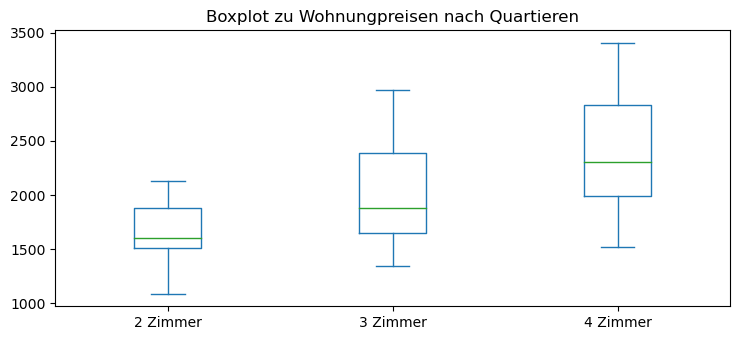

In [234]:
plt.rcParams['figure.figsize'] = [7.5, 3.5]
plt.rcParams['figure.autolayout'] = True

data = pd.DataFrame({'2 Zimmer': df_2Zimmer['mean'], '3 Zimmer': df_3Zimmer['mean'], '4 Zimmer': df_4Zimmer['mean']})

ax = data [['2 Zimmer', '3 Zimmer', '4 Zimmer']].plot(kind='box', title ='Boxplot zu Wohnungpreisen nach Quartieren')

plt.show

In [235]:
#Most / least expensive quartier for flat size
print('\033[1m' +'Quartiere für 2 Zimmer Wohnungen:' + '\033[0m')
print ('teuerstes: ' + df_2Zimmer[df_2Zimmer['mean'] == df_2Zimmer['mean'].max()].Gliederung)
print ('günstigstes: ' + str(df_2Zimmer[df_2Zimmer['mean'] == df_2Zimmer['mean'].min()].Gliederung) + '\n')

print('\033[1m' +'Quartiere für 3 Zimmer Wohnungen:' + '\033[0m')
print ('teuerstes: ' + df_3Zimmer[df_3Zimmer['mean'] == df_3Zimmer['mean'].max()].Gliederung)
print ('günstigstes: ' + str(df_3Zimmer[df_3Zimmer['mean'] == df_3Zimmer['mean'].min()].Gliederung) + '\n')

print('\033[1m' +'Quartiere für 4 Zimmer Wohnungen:' + '\033[0m')
print ('teuerstes: ' + df_4Zimmer[df_4Zimmer['mean'] == df_4Zimmer['mean'].max()].Gliederung)
print ('günstigstes: ' + df_4Zimmer[df_4Zimmer['mean'] == df_4Zimmer['mean'].min()].Gliederung)

Quartiere für 2 Zimmer Wohnungen:
1708    teuerstes: Seefeld
Name: Gliederung, dtype: object
günstigstes: 1695    Friesenberg
Name: Gliederung, dtype: object

Quartiere für 3 Zimmer Wohnungen:
1724    teuerstes: Lindenhof
Name: Gliederung, dtype: object
günstigstes: 1753    Saatlen
Name: Gliederung, dtype: object

Quartiere für 4 Zimmer Wohnungen:
1758    teuerstes: Hochschulen
Name: Gliederung, dtype: object
1788    günstigstes: Saatlen
Name: Gliederung, dtype: object


In [236]:
# drop first unused column
df = df.drop(df.columns[0], axis=1)
# we are only intrested in district data
df = df[df.Raumeinheit == 'Quartiere']
# we dont need the data concerning the whole city
df = df[df.Gliederung != 'Ganze Stadt']
# save current DF to csv just for development (for use in spacial data notebook)

df.to_csv('../data/rentalprices_temp.csv', sep=';')
df.head()

AttributeError: 'DataFrame' object has no attribute 'Raumeinheit'